In [1]:
from tensorflow import keras
from keras import layers, models, utils, preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
data = pd.read_csv('1Datasets/snp500_history.csv')

In [50]:
train_set = data[['Open']]

In [51]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set = sc.fit_transform(train_set)

In [52]:
X_train = []
y_train = []
for i in range(60, len(train_set)):
    X_train.append(train_set[i-60:i, 0])
    y_train.append(train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [53]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.01, shuffle=False)

In [8]:
model = Sequential([
    layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(units = 50, return_sequences = True),
    layers.Dropout(0.2),
    layers.LSTM(units = 50, return_sequences = True),
    layers.Dropout(0.2),
    layers.LSTM(units = 50),
    layers.Dropout(0.2),
    layers.Dense(units = 1)
])


In [9]:
model.compile(optimizer = 'adam',
                  loss = 'mean_squared_error')


In [10]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100

598/598 [==============================] - 38s 49ms/step - loss: 0.0010
Epoch 2/100
598/598 [==============================] - 29s 48ms/step - loss: 5.0698e-04
Epoch 3/100
598/598 [==============================] - 29s 49ms/step - loss: 4.9632e-04
Epoch 4/100
598/598 [==============================] - 29s 48ms/step - loss: 4.4577e-04
Epoch 5/100
598/598 [==============================] - 29s 49ms/step - loss: 4.2599e-04
Epoch 6/100
598/598 [==============================] - 29s 49ms/step - loss: 4.1980e-04
Epoch 7/100
598/598 [==============================] - 29s 49ms/step - loss: 4.5251e-04
Epoch 8/100
598/598 [==============================] - 29s 49ms/step - loss: 3.7739e-04
Epoch 9/100
598/598 [==============================] - 30s 50ms/step - loss: 3.7206e-04
Epoch 10/100
598/598 [==============================] - 30s 50ms/step - loss: 4.0907e-04
Epoch 11/100
598/598 [==============================] - 30s 50ms/step - loss: 3.6446e-04
Epoch 12/100
598/598 [===========

In [19]:
model.save('snpLSTM.keras')

In [55]:
pre = model.predict(X_test)

8/8 [==============================] - 0s 18ms/step


In [56]:
pre = sc.inverse_transform(pre)

In [57]:
y_test = y_test.reshape(-1, 1)
y_test = sc.inverse_transform(y_test)

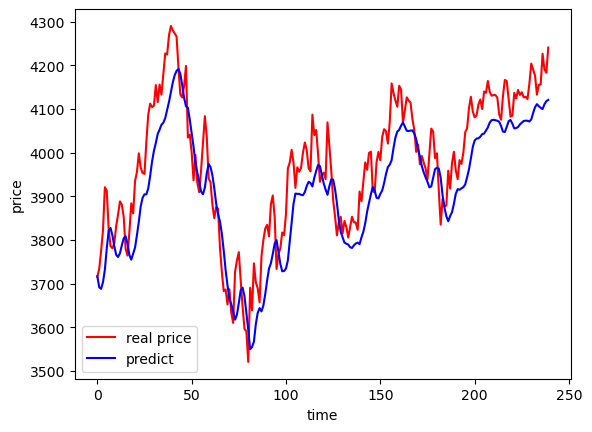

In [58]:
plt.plot(y_test, color = 'red', label = 'real price')
plt.plot(pre, color = 'blue', label = 'predict')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()